# Comparing Transformer Tokenizers

## Word2Vec and GloVe dictionary download

In [ ]:
!wget -P /root/input/ -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"
!wget -P /root/input/ -c "http://nlp.stanford.edu/data/glove.6B.zip"

In [ ]:
!unzip '/root/input/glove.6B.zip'

In [ ]:
from gensim.scripts.glove2word2vec import glove2word2vec
glove_input_file = 'glove.6B.300d.txt'
word2vec_output_file = 'glove.6B.300d.txt.word2vec'
glove2word2vec(glove_input_file, word2vec_output_file)

In [ ]:
from gensim.models import KeyedVectors
import gensim
WORD2WEC_EMBEDDING_FILE = '/root/input/GoogleNews-vectors-negative300.bin.gz' # from above
word2vec = KeyedVectors.load_word2vec_format(WORD2WEC_EMBEDDING_FILE, binary=True)
#word2vec30k = KeyedVectors.load_word2vec_format(WORD2WEC_EMBEDDING_FILE, binary=True, limit=30000)

In [ ]:
glove = KeyedVectors.load_word2vec_format(word2vec_output_file, binary=False)

## HuggingFace Transformers

In [ ]:
!pip install transformers
from transformers import *


In [ ]:
!wget -P /root/input/ -c "https://s3.amazonaws.com/models.huggingface.co/bert/xlm-mlm-en-2048-vocab.json"
!wget -P /root/input -c "https://s3.amazonaws.com/models.huggingface.co/bert/gpt2-xl-vocab.json"
!wget -P /root/input -c "https://s3.amazonaws.com/models.huggingface.co/bert/roberta-base-vocab.json"

## GPT-2 and RoBERTa shares the same vocabulary in HuggingFace

In [ ]:
import json

In [ ]:
with open('/root/input/roberta-base-vocab.json',  encoding="utf-8") as json_file:
    roberta_data = json.load(json_file)

In [ ]:
with open('/root/input/gpt2-xl-vocab.json',  encoding="utf-8") as json_file:
    gpt2_data = json.load(json_file)

Removing special characters

In [ ]:
replacer = lambda x: x.replace('\u0120', "")
roberta_data = list(map(replacer, roberta_data))
gpt2_data = list(map(replacer, gpt2_data))

Vocabulary comparison

In [ ]:
def get_vocab_sim(first_vocab_keys, second_vocab_keys):
    f_set =set(first_vocab_keys)
    s_set = set(second_vocab_keys)
    intersection = f_set.intersection(s_set)
    return intersection, len(intersection)/len(f_set), len(intersection)/len(s_set)

In [ ]:
_, f, s = get_vocab_sim(roberta_data, gpt2_data)
print(f,s)

0.9998082730192206 1.0


Expected output: 0.9998082730192206 1.0

## Comparing Tokenizer vocabularies

In [ ]:
import json

Removing special characters

In [ ]:
replacer = lambda x: x.replace('\u0120', "")
replacer2 = lambda x: x.replace('##', "")
replacer3 = lambda x: x.replace("</w>", "")
#gpt2_data = list(map(replacer, gpt2_data))

Loading models and vocabularies

In [ ]:
bert_uncased = BertTokenizer.from_pretrained('bert-base-uncased')
bert_cased = BertTokenizer.from_pretrained('bert-base-cased')
bert_multi = BertTokenizer.from_pretrained('bert-base-multilingual-cased')
xlm = XLMTokenizer.from_pretrained('xlm-mlm-en-2048')
gpt2 = GPT2Tokenizer.from_pretrained('gpt2')

with open('/root/input/gpt2-xl-vocab.json',  encoding="utf-8") as json_file:
    gpt2_data = json.load(json_file)

with open('/root/input/xlm-mlm-en-2048-vocab.json',  encoding="utf-8") as json_file:
    xlm_data = json.load(json_file)

Removing special characters

In [ ]:
bert_uncased_woc = list(map(replacer2,bert_uncased.vocab.keys()))
bert_cased_woc = list(map(replacer2, bert_cased.vocab.keys()))
bert_multi_woc = list(map(replacer2,bert_multi.vocab.keys()))

gpt2_data_woc = list(map(replacer, gpt2_data_woc))

xlm_data_woc = list(map(replacer3, xlm_data.keys()))

word2vec_woc = list(map(replacer2, word2vec.vocab.keys()))
glove_woc = list(map(replacer2, glove.vocab.keys()))


Comparing vocabularies

In [ ]:
first_vocab = bert_cased_woc

_, f, s = get_vocab_sim(first_vocab, bert_cased_woc)
print (f, s)
_, f, s = get_vocab_sim(first_vocab, bert_uncased_woc)
print (f, s)
_, f, s = get_vocab_sim(first_vocab, bert_multi_woc)
print (f, s)
_, f, s = get_vocab_sim(first_vocab, xlm_data_woc)
print (f, s)
_, f, s = get_vocab_sim(first_vocab, gpt2_data_woc)
print (f, s)
_, f, s = get_vocab_sim(first_vocab, word2vec_woc)
print (f, s)
_, f, s = get_vocab_sim(first_vocab, glove_woc)
print (f, s)

1.0 1.0
0.6391771821100575 0.6155754503289829
0.658067647278429 0.16918617485866758
0.5847830956469797 0.574551590067124
0.78772493093407 0.5058617630840785
0.8769133129246621 0.007851291741219232
0.6091241693421937 0.04079010197525494


## Tokenizer Differences

In [ ]:
same_words = 0
wrong_words = 0
wrong_word_counter_list = []
for word in list(word2vec.vocab.keys())[:10000]:
    word = word.lower()
    bert_uncased_token = bert_uncased.tokenize(word)
    bert_uncased_token = list(map(replacer2, bert_uncased_token))
    bert_cased_token = bert_cased.tokenize(word)
    bert_cased_token = list(map(replacer2, bert_cased_token))
    bert_multi_token = bert_multi.tokenize(word)
    bert_multi_token = list(map(replacer2, bert_multi_token))
    gpt2_token = gpt2.tokenize(word)
    gpt2_token = list(map(replacer, gpt2_token))
    xlm_token = xlm.tokenize(word)
    xlm_token = list(map(replacer3, xlm_token))
    #if len(bert_uncased_token) == 1 and len(bert_multi_token) == 1 and len(gpt2_token) == 1 and len(xlm_token) == 1:
    #    same_words +=1
    if bert_uncased_token == bert_cased_token and bert_uncased_token == bert_multi_token and bert_uncased_token == gpt2_token and bert_uncased_token == xlm_token:
        same_words += 1
    else:
        wrong_words +=1
        #print(bert_uncased_token, bert_cased_token, bert_multi_token, gpt2_token, xlm_token)
    wrong_word_counter_list.append(same_words)
print(same_words)
print(wrong_words)

3055
6945


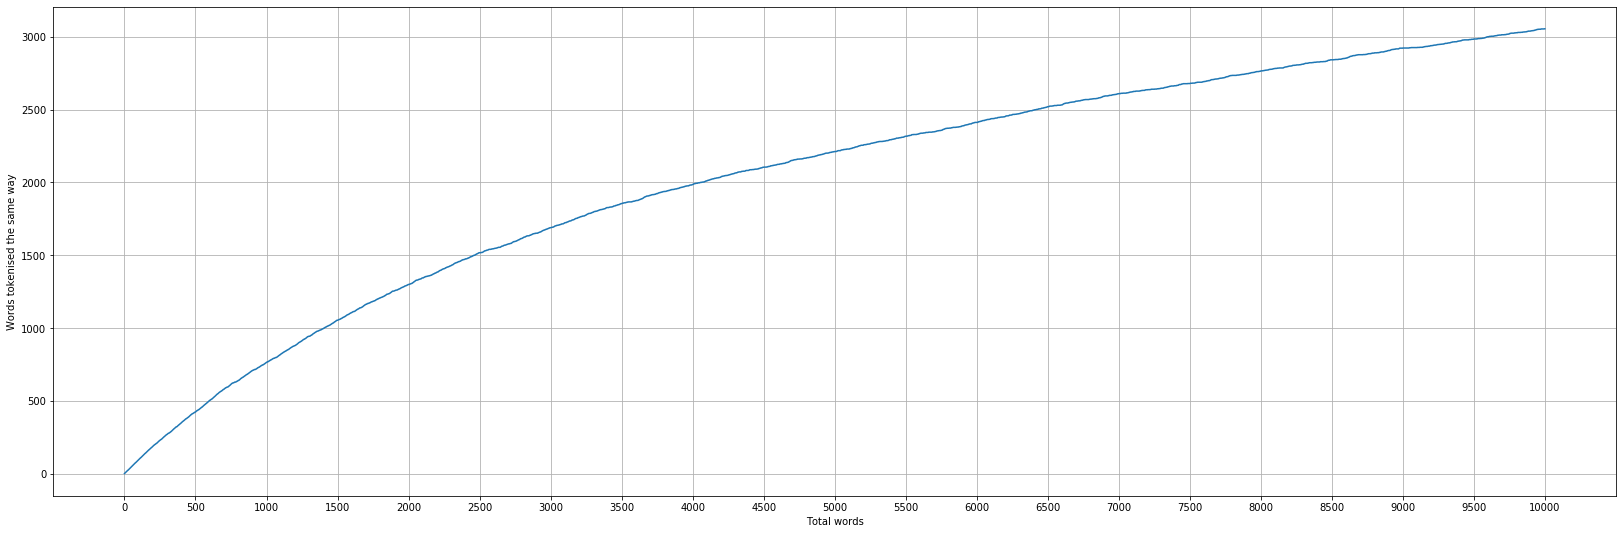

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(28,9))
minor_ticks = np.arange(0,11000,500)
plt.xticks(minor_ticks)
plt.grid()
plt.xlabel("Total words")
plt.ylabel("Words tokenised the same way")
plt.plot(wrong_word_counter_list[:10000])
plt.show()

In [ ]:
['Marion'] ['marion'] ['Marion'] ['Mar', 'ion'] ['marion']
All: 2184
Lower: 3055
['b', 'ap', 'tist'] ['baptist'] ['ba', 'ptis', 't'] ['b', 'apt', 'ist'] ['baptist']
['n', 'ug', 'gets'] ['nu', 'gg', 'ets'] ['nu', 'gge', 'ts'] ['n', 'uggets'] ['nu', 'g', 'gets']
763

In [ ]:
bert_cased.tokenize("tokenization")

['token', '##ization']

In [ ]:
gpt2.tokenize("tokenization")

['token', 'ization']

In [ ]:
xlm.tokenize("tokenization")

['to', 'ken', 'ization</w>']